# Estudio del Sistema de Lorenz mediante Métodos Numéricos

**Miriam Rocío Doña López (00022423), Guillermo Rafael Cáceres Estrada (00132623), Henry Saúl Martínez Flores (00012622), David Alejandro Sandoval Quijano (00379422), Juan José Melgar Flores (00073923)**  

Departamento de Matemática, Facultad de Ingeniería y Arquitectura  
Universidad Centroamericana José Simeón Cañas (UCA), San Salvador, El Salvador  


# 1. Introducción

El análisis de sistemas dinámicos no lineales ha despertado un fuerte interés en distintas áreas de la ciencia y la ingeniería a lo largo del tiempo. Entre estos sistemas, el modelo de Lorenz, propuesto por Edward Lorenz en 1963, destaca como un caso emblemático para estudiar el comportamiento caótico en sistemas deterministas. Este modelo, que originalmente fue diseñado para representar de manera simplificada la convección atmosférica, mostró desde el principio una gran sensibilidad a pequeñas variaciones en las condiciones iniciales. Esa característica fue la base del conocido concepto del "efecto mariposa".

Uno de los principales desafíos que plantea este tipo de sistemas es que debido a su comportamiento no lineal, resulta imposible obtener soluciones analíticas exactas en la mayoría de los casos. Por dicha razón, se vuelve fundamental recurrir a técnicas numéricas que permitan analizar su evolución en el tiempo, por lo que en este proyecto se estudia el sistema de Lorenz aplicando precisamente esas herramientas, con énfasis en dos de los métodos más comunes para resolver ecuaciones diferenciales ordinarias: el método de Euler y el método de Runge-Kutta de cuarto orden (RK4).

De  modo que, a través de estas aproximaciones, no solo se busca representar visualmente el conocido Atractor de Lorenz, sino también evaluar cómo cada método responde en términos de precisión, estabilidad y consumo de recursos computacionales, identificando qué tan bien logran capturar la compleja dinámica de un sistema cuya sensibilidad hace que pequeñas diferencias iniciales lleven a trayectorias completamente distintas.

# 2. Método de Euler

## 2.1. Método de Euler aplicado al sistema de Lorenz

En esta parte del notebook simula el comportamiento del sistema de Lorenz usando el método numérico de Euler. Se analizará cómo varía la dinámica del sistema ante distintos conjuntos de condiciones iniciales y parámetros, mostrando gráficamente las variables \(x(t)\), \(y(t)\) y \(z(t)\) para cada caso.


### 2.1.1. Librerias requeridas para el análisis

In [46]:
import numpy as np
import matplotlib.pyplot as plt


### 2.1.2. Definimos la función requerida para resolver el sistema con Euler

In [47]:
def lorenz_euler(x0, y0, z0, sigma, rho, beta, h, t_max):
    # n: número de pasos a partir del tiempo total y tamaño de paso
    n = int(t_max / h)
    ts = np.linspace(0, t_max, n+1)
    
    # Inicialización de listas y condiciones iniciales
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0

    # Método de Euler: se actualiza cada variable según su derivada
    for _ in range(n):
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z

        x += h * dx
        y += h * dy
        z += h * dz

        xs.append(x)
        ys.append(y)
        zs.append(z)

    # Se devuelven los resultados en forma de arreglo para graficar
    return ts, np.array(xs), np.array(ys), np.array(zs)


### 2.1.3. Justificación del tamaño de paso y tiempo de simulación

Se eligió un tamaño de paso $h = 0.01$ por ser suficientemente pequeño para garantizar estabilidad y precisión en el método de Euler, especialmente ante el comportamiento caótico del sistema de Lorenz. Un paso mayor podría generar errores numéricos significativos o pérdida de la forma del atractor.

El tiempo total de simulación $t_{\text{max}} = 30$ permite observar múltiples ciclos del sistema y visualizar claramente las diferencias entre condiciones iniciales y parámetros, sin hacer el cálculo innecesariamente largo.


## 2.2. Caso 1: 
Condición inicial (1, 1, 1)
Parámetros: (10, 28, 8/3)

In [48]:
# Parámetros del sistema
sigma = 10
rho = 28
beta = 8/3

# Condición inicial
x0, y0, z0 = 1, 1, 1

# Tiempo de simulación y paso
h = 0.01
t_max = 30


### 2.2.1. Aplicación de la función de Euler

In [49]:
# Llamada a la función de Euler para resolver el sistema de Lorenz
ts, xs, ys, zs = lorenz_euler(x0, y0, z0, sigma, rho, beta, h, t_max)


### 2.2.2. Gráficos
Creación de los gráficos para representar la variación de la dinámica del sistema ante los cambios en condiciones iniciales mediante gráficas de x,y,z en función del tiempo

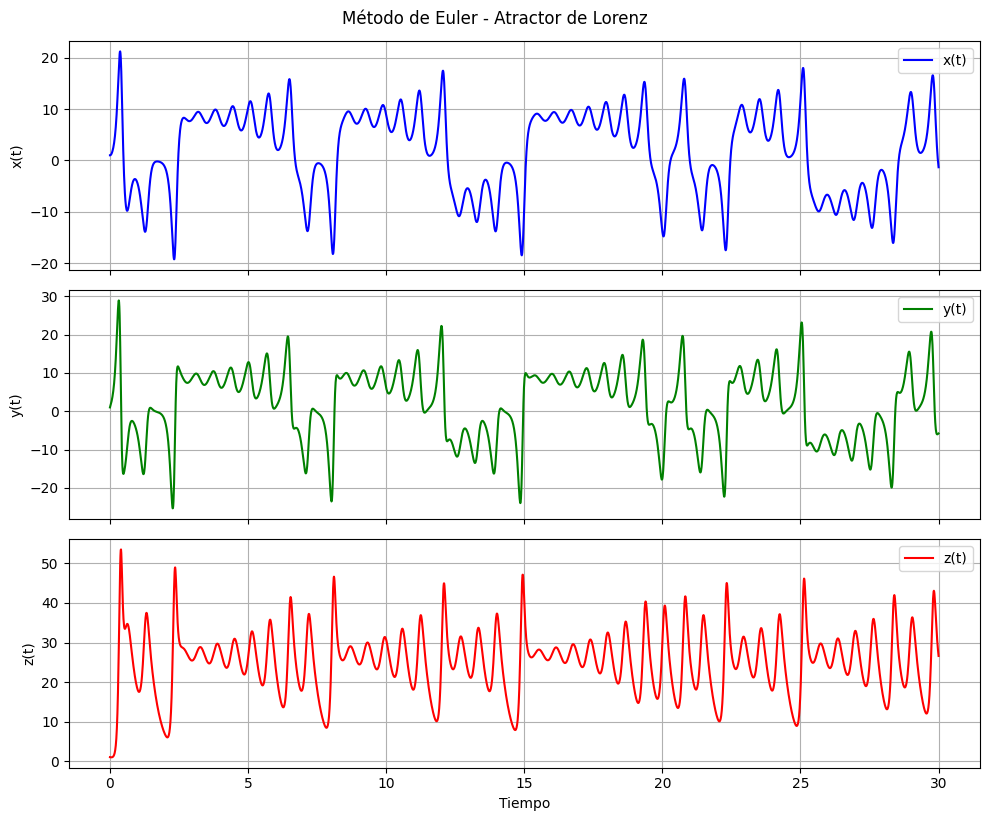

In [50]:
# Creamos una figura con 3 subgráficas verticales que comparten el eje x (tiempo)
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Dibujamos x(t),y(t),z(t) en la cada subgráfica correspondiente
axs[0].plot(ts, xs, color='blue', label='x(t)')
axs[1].plot(ts, ys, color='green', label='y(t)')
axs[2].plot(ts, zs, color='red', label='z(t)')

# Agregamos las etiquetas del eje y para cada variable
axs[0].set_ylabel('x(t)')
axs[1].set_ylabel('y(t)')
axs[2].set_ylabel('z(t)')
# Etiqueta del eje x solo en la última gráfica
axs[2].set_xlabel('Tiempo')

for ax in axs:
    ax.legend()
    ax.grid(True)

# Configuración de la visualización
plt.tight_layout()
plt.suptitle("Método de Euler - Atractor de Lorenz", y=1.02)
plt.show()


### 2.2.3. Visualización 3D del atractor de Lorenz

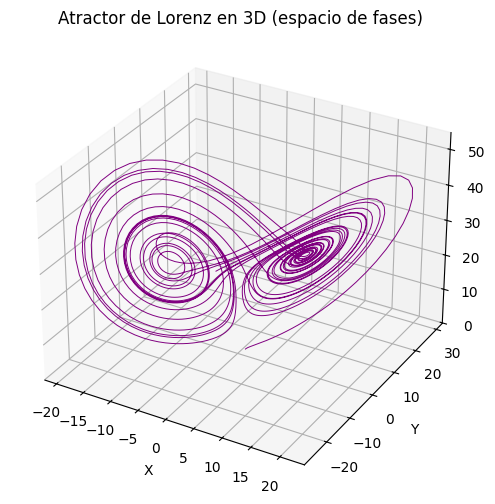

In [51]:
# Importamos herramienta para gráficos 3D de Matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Crea una figura con tamaño definido
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
# Dibuja la trayectoria del sistema en el espacio (x, y, z)
ax.plot(xs, ys, zs, color='purple', linewidth=0.7)

# Título y etiquetas de los ejes
ax.set_title("Atractor de Lorenz en 3D (espacio de fases)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

## 2.3. Caso 2: 
Condición inicial (1.002025, 0.2, 0.4) 
Mismos parámetros

In [52]:
# Parámetros del sistema
sigma = 10
rho = 28
beta = 8/3

# Condición inicial
x0, y0, z0 = 1.002025, 0.2, 0.4

# Tiempo de simulación y paso
h = 0.01
t_max = 30

### 2.3.1. Aplicación de la función de Euler

In [53]:
# Llamada a la función de Euler para resolver el sistema de Lorenz
ts1, xs1, ys1, zs1 = lorenz_euler(x0, y0, z0, sigma, rho, beta, h, t_max)


### 2.3.2. Gráficos
Creación de los gráficos para representar la variación de la dinámica del sistema ante los cambios en condiciones iniciales mediante gráficas de x,y,z en función del tiempo

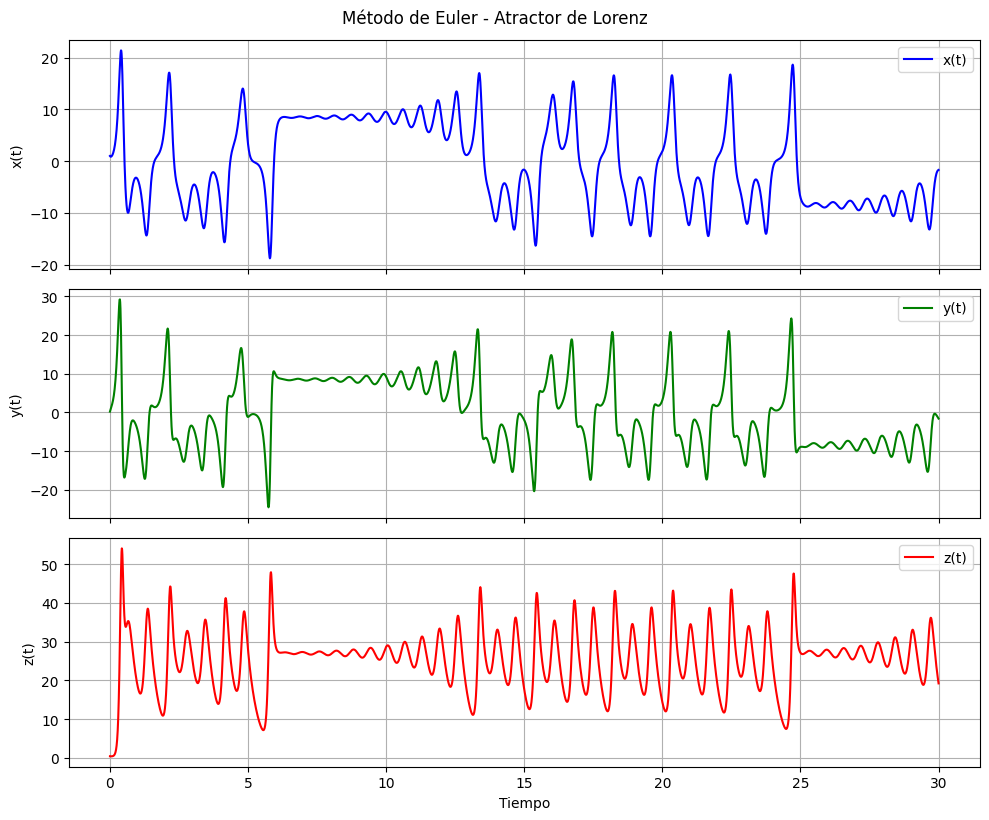

In [54]:
# Creamos una figura con 3 subgráficas verticales que comparten el eje x (tiempo)
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Dibujamos x(t),y(t),z(t) en la cada subgráfica correspondiente
axs[0].plot(ts1, xs1, color='blue', label='x(t)')
axs[1].plot(ts1, ys1, color='green', label='y(t)')
axs[2].plot(ts1, zs1, color='red', label='z(t)')

# Agregamos las etiquetas del eje y para cada variable
axs[0].set_ylabel('x(t)')
axs[1].set_ylabel('y(t)')
axs[2].set_ylabel('z(t)')
# Etiqueta del eje x solo en la última gráfica
axs[2].set_xlabel('Tiempo')

for ax in axs:
    ax.legend()
    ax.grid(True)

# Configuración de la visualización
plt.tight_layout()
plt.suptitle("Método de Euler - Atractor de Lorenz", y=1.02)
plt.show()


### 2.3.3. Visualización 3D del atractor de Lorenz

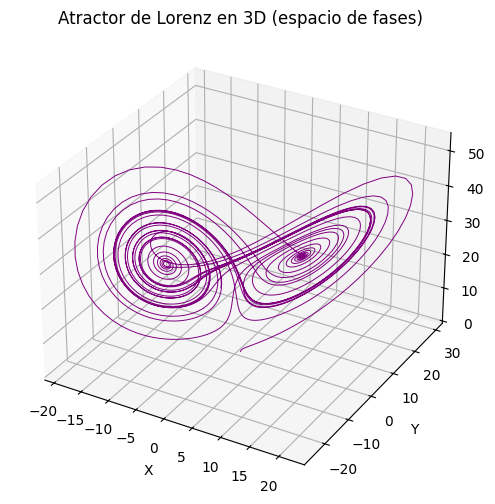

In [55]:
# Importamos herramienta para gráficos 3D de Matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Crea una figura con tamaño definido
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
# Dibuja la trayectoria del sistema en el espacio (x, y, z)
ax.plot(xs1, ys1, zs1, color='purple', linewidth=0.7)

# Título y etiquetas de los ejes
ax.set_title("Atractor de Lorenz en 3D (espacio de fases)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

## 2.4. Caso 3: 
Condición inicial (2, 0.009, 0.7)
Parámetros: (9, 18, 10/3)


In [56]:
# Parámetros del sistema
sigma = 9
rho = 18
beta = 10/3

# Condición inicial
x0, y0, z0 = 2, 0.009, 0.7

# Tiempo de simulación y paso
h = 0.01
t_max = 30

### 2.4.1. Aplicación de la función de Euler

In [57]:
# Llamada a la función de Euler para resolver el sistema de Lorenz
ts2, xs2, ys2, zs2 = lorenz_euler(x0, y0, z0, sigma, rho, beta, h, t_max)


### 2.4.2. Gráficos
Creación de los gráficos para representar la variación de la dinámica del sistema ante los cambios en condiciones iniciales mediante gráficas de x,y,z en función del tiempo

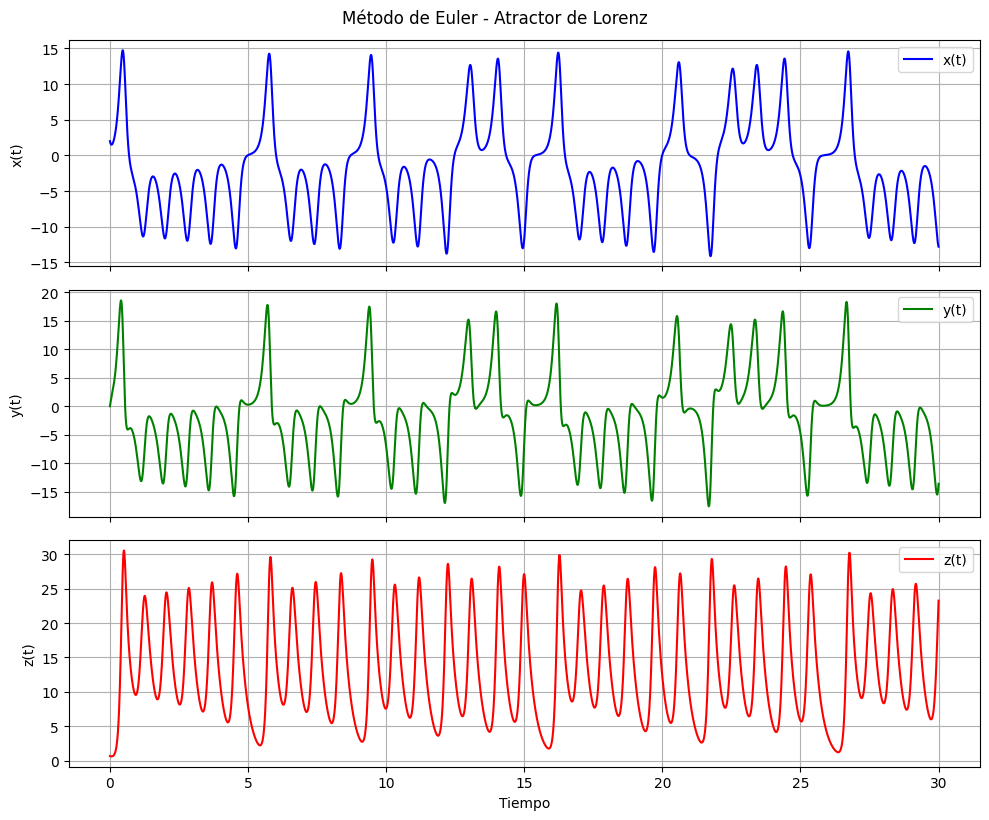

In [58]:
# Creamos una figura con 3 subgráficas verticales que comparten el eje x (tiempo)
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Dibujamos x(t),y(t),z(t) en la cada subgráfica correspondiente
axs[0].plot(ts2, xs2, color='blue', label='x(t)')
axs[1].plot(ts2, ys2, color='green', label='y(t)')
axs[2].plot(ts2, zs2, color='red', label='z(t)')

# Agregamos las etiquetas del eje y para cada variable
axs[0].set_ylabel('x(t)')
axs[1].set_ylabel('y(t)')
axs[2].set_ylabel('z(t)')
# Etiqueta del eje x solo en la última gráfica
axs[2].set_xlabel('Tiempo')

for ax in axs:
    ax.legend()
    ax.grid(True)

# Configuración de la visualización
plt.tight_layout()
plt.suptitle("Método de Euler - Atractor de Lorenz", y=1.02)
plt.show()

### 2.4.3. Visualización 3D del atractor de Lorenz

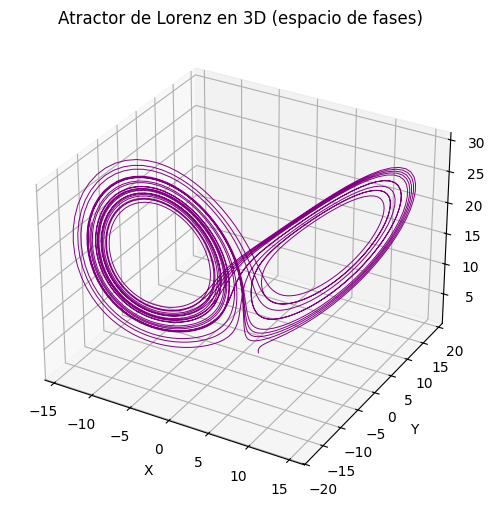

In [59]:
# Importamos herramienta para gráficos 3D de Matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Crea una figura con tamaño definido
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
# Dibuja la trayectoria del sistema en el espacio (x, y, z)
ax.plot(xs2, ys2, zs2, color='purple', linewidth=0.7)

# Título y etiquetas de los ejes
ax.set_title("Atractor de Lorenz en 3D (espacio de fases)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

## 2.5. Análisis: Variación de la dinámica ante cambios en condiciones iniciales

El sistema de Lorenz, definido por el siguiente conjunto de ecuaciones diferenciales no lineales:

$$
\begin{cases}
\frac{dx}{dt} = \sigma (y - x) \\
\frac{dy}{dt} = x(\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{cases}
$$

es conocido por su alta sensibilidad a las condiciones iniciales. En este proyecto se evaluaron tres simulaciones:

- **Caso 1:** $(x_0, y_0, z_0) = (1, 1, 1)$
- **Caso 2:** $(x_0, y_0, z_0) = (1.002025, 0.2, 0.4)$
- **Caso 3:** $(x_0, y_0, z_0) = (2, 0.009, 0.7)$

Los casos 1 y 2 utilizaron los mismos parámetros físicos ($\sigma = 10$, $\rho = 28$, $\beta = \frac{8}{3}$), mientras que el caso 3 empleó un conjunto distinto. Al observar las gráficas de $x(t)$, $y(t)$, y $z(t)$, se nota que **una mínima diferencia en el estado inicial genera trayectorias completamente diferentes**, incluso en los primeros segundos de simulación.

Este fenómeno, llamado **efecto mariposa**, fue descrito por Edward Lorenz en 1963 [1] y representa una propiedad fundamental del caos determinista. Matemáticamente, esta sensibilidad se asocia con la existencia de **exponentes de Lyapunov positivos**, que indican que dos trayectorias que parten de puntos muy cercanos divergen exponencialmente con el tiempo [2].

En los tres casos simulados se confirma esta sensibilidad: incluso al mantener parámetros constantes, las trayectorias divergen radicalmente. Esto vuelve **imposible predecir el comportamiento a largo plazo del sistema** sin conocer las condiciones iniciales con altísima precisión.

## 2.6. Análisis: Efecto de la variación de parámetros en el comportamiento del sistema

Además de cambiar las condiciones iniciales, se exploró cómo afecta el cambio de parámetros en la dinámica del sistema. Los tres casos analizados fueron:

- **Casos 1 y 2:** Parámetros clásicos del atractor de Lorenz: $\sigma = 10$, $\rho = 28$, $\beta = \frac{8}{3}$
- **Caso 3:** Parámetros modificados: $\sigma = 9$, $\rho = 18$, $\beta = \frac{10}{3}$

Las gráficas de $x(t)$, $y(t)$, y $z(t)$ para los tres casos muestran cómo la modificación de los parámetros en el caso 3 resulta en un comportamiento mucho más **estable y menos caótico**. Mientras que los casos 1 y 2 presentan oscilaciones abruptas, trayectorias erráticas y signos claros de caos, el caso 3 muestra un comportamiento más **periódico y controlado**.

Esto se debe a que los parámetros $\sigma$, $\rho$ y $\beta$ definen la **estructura geométrica del campo vectorial** del sistema. Por ejemplo, el parámetro $\rho$ actúa como un controlador de bifurcaciones: cuando $\rho < 24.74$, el sistema tiende hacia puntos de equilibrio; cuando $\rho > 24.74$, se desencadena el caos [3].

Desde el análisis de sistemas dinámicos, los cambios en la estabilidad también pueden estudiarse mediante la **matriz Jacobiana**, cuyas raíces determinan el comportamiento de los puntos fijos [4]. En resumen, la elección de parámetros no solo cambia la forma del atractor, sino también su estabilidad, periodicidad y sensibilidad global.

Los tres casos evidencian esta relación: los parámetros clásicos del atractor de Lorenz inducen caos; los parámetros modificados lo reducen significativamente.

# 3. Método de Runge-Kutta de orden 4

## 3.1. Método de Runge-Kutta aplicado al sistema de Lorenz


### 3.1.1. Librerias necesarias para el análisis

In [28]:
import numpy as np
import matplotlib.pyplot as plt

### 3.1.2. Definición del sistema de Lorenz

Se define una función llamada lorenz_system que representa el sistema de ecuaciones diferenciales del atractor de Lorenz. Esta función toma como argumentos los valores actuales de $(x, y, z)$ y los parámetros del sistema $(\sigma, \rho, \beta)$, y devuelve las derivadas correspondientes $(\dot{x}, \dot{y}, \dot{z})$.

Las ecuaciones que se implementan son:

\[
\begin{aligned}
\dot{x} &= \sigma (y - x) \\
\dot{y} &= x (\rho - z) - y \\
\dot{z} &= x y - \beta z
\end{aligned}
\]



In [29]:
def lorenz_system(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

## 3.2. Implementación del Método de Runge-Kutta de Cuarto Orden (RK4)

La siguiente función runge_kutta_4 implementa el método RK4 para sistemas tridimensionales como el de Lorenz. A continuación se explican los componentes de la función:

#### 2.2.1 Parámetros de entrada:
- $x_0, y_0, z_0$: condiciones iniciales.
- $t_0, t_f$: tiempo inicial y final de simulación.
- $h$: tamaño de paso.
- $\sigma, \rho, \beta$: parámetros del sistema de Lorenz.

#### 2.2.2 Pasos del método:
1. Se calcula el número total de pasos con $n = \frac{t_f - t_0}{h}$.
2. Se inicializan vectores `x`, `y`, `z` con ceros para almacenar la trayectoria.
3. En cada iteración se calculan los valores intermedios $k_1, k_2, k_3, k_4$ para cada variable del sistema usando `lorenz_system`.
4. Se actualizan los valores de $x_{n+1}, y_{n+1}, z_{n+1}$ usando la fórmula de Runge-Kutta de cuarto orden:

\[
\begin{aligned}
x_{n+1} &= x_n + \frac{h}{6}(k_{1x} + 2k_{2x} + 2k_{3x} + k_{4x}) \\
y_{n+1} &= y_n + \frac{h}{6}(k_{1y} + 2k_{2y} + 2k_{3y} + k_{4y}) \\
z_{n+1} &= z_n + \frac{h}{6}(k_{1z} + 2k_{2z} + 2k_{3z} + k_{4z})
\end{aligned}
\]

#### 2.2.3 Valor de retorno:
La función devuelve los vectores `t`, `x`, `y`, `z` que contienen la evolución del sistema a lo largo del tiempo [5].


In [30]:
def runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n+1)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)

    x[0], y[0], z[0] = x0, y0, z0

    for i in range(n):
        dx1, dy1, dz1 = lorenz_system(x[i], y[i], z[i], sigma, rho, beta)
        dx2, dy2, dz2 = lorenz_system(
            x[i] + h * dx1 / 2, y[i] + h * dy1 / 2, z[i] + h * dz1 / 2, sigma, rho, beta)
        dx3, dy3, dz3 = lorenz_system(
            x[i] + h * dx2 / 2, y[i] + h * dy2 / 2, z[i] + h * dz2 / 2, sigma, rho, beta)
        dx4, dy4, dz4 = lorenz_system(
            x[i] + h * dx3, y[i] + h * dy3, z[i] + h * dz3, sigma, rho, beta)

        x[i+1] = x[i] + (h / 6) * (dx1 + 2 * dx2 + 2 * dx3 + dx4)
        y[i+1] = y[i] + (h / 6) * (dy1 + 2 * dy2 + 2 * dy3 + dy4)
        z[i+1] = z[i] + (h / 6) * (dz1 + 2 * dz2 + 2 * dz3 + dz4)

    return t, x, y, z


## 3.3. Simulación del Caso 1

En este primer caso, se utilizan los parámetros más conocidos del sistema de Lorenz, que generan un comportamiento caótico clásico:

- $\sigma = 10$
- $\rho = 28$
- $\beta = \frac{8}{3}$
- Condiciones iniciales: $x_0 = y_0 = z_0 = 1$
- Intervalo de integración: $t \in [0, 40]$
- Paso de integración: $h = 0.01$

Se utilizará el método de Runge-Kutta de cuarto orden (RK4) para simular este sistema y graficar las variables $x(t)$, $y(t)$ y $z(t)$, así como su trayectoria tridimensional.

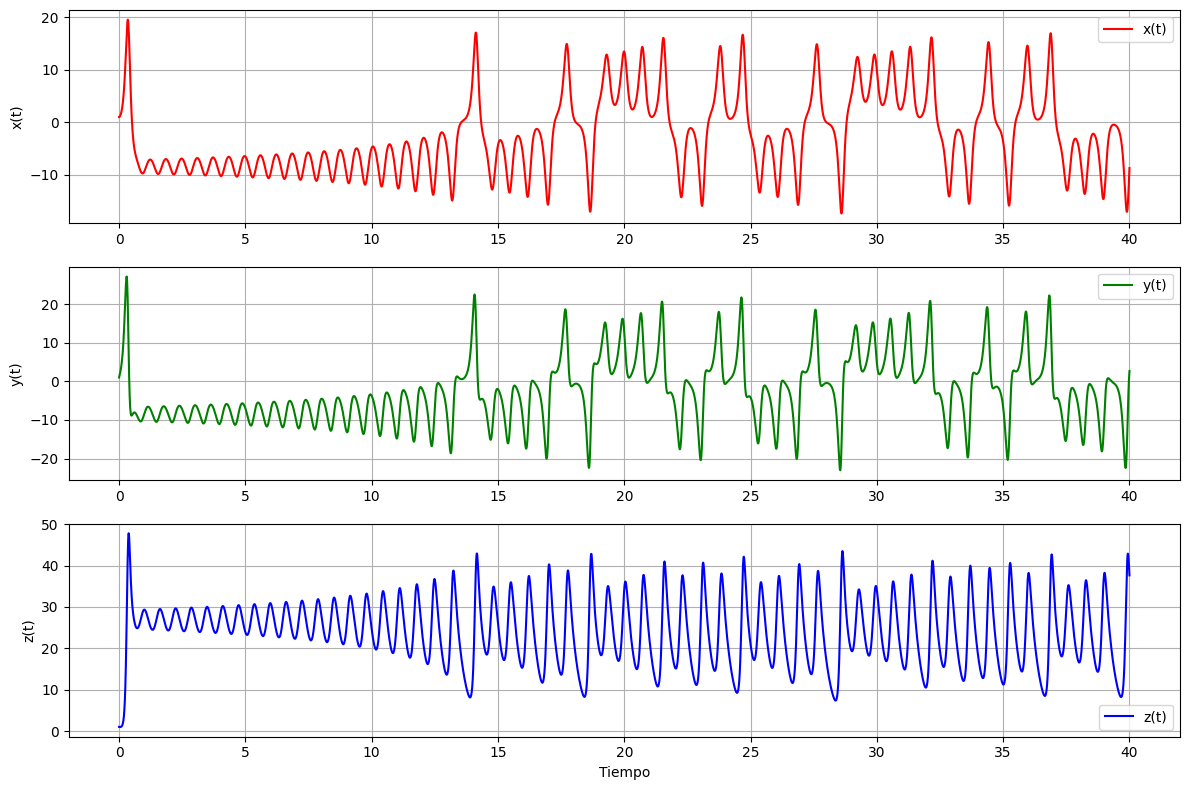

In [31]:
sigma = 10
rho = 28
beta = 8 / 3
x0 = y0 = z0 = 1
t0 = 0
tf = 40
h = 0.01
n = int((tf - t0) / h)

t, x, y, z = runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, color='red', label='x(t)')
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y, color='green', label='y(t)')
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, z, color='blue', label='z(t)')
plt.xlabel("Tiempo")
plt.ylabel("z(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 3.3.1. Resultados de las componentes $x(t)$, $y(t)$ y $z(t)$

Las gráficas muestran la evolución temporal de las tres variables del sistema de Lorenz para el Caso 1, resuelto con el método de Runge-Kutta de cuarto orden (RK4):

- La función $x(t)$ (en rojo) presenta oscilaciones que rápidamente se vuelven caóticas, con picos irregulares y sin un patrón repetitivo claro. Esto es característico del comportamiento sensible a condiciones iniciales.
  
- La función $y(t)$ (en verde) sigue una dinámica similar a $x(t)$.

- La función $z(t)$ (en azul) muestra un crecimiento rápido en los primeros instantes. Aunque es visualmente más estable, $z(t)$ también forma parte del comportamiento caótico.

Este tipo de comportamiento no periódico, no lineal y altamente sensible es una evidencia clara de la dinámica caótica del atractor de Lorenz bajo las condiciones clásicas de este caso.


### 3.3.2. Visualización tridimensional del atractor

A continuación se muestra la trayectoria del sistema de Lorenz en el espacio tridimensional $(x, y, z)$ para los parámetros del Caso 1. Esta visualización permite observar la naturaleza caótica del sistema.

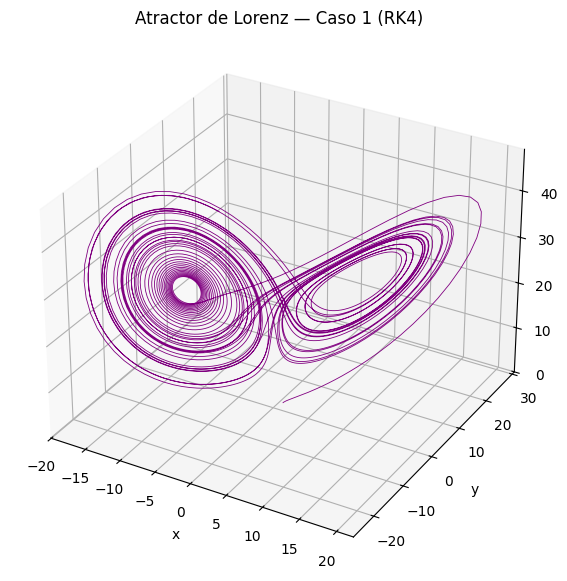

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='purple', lw=0.6)
ax.set_title("Atractor de Lorenz — Caso 1 (RK4)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

## 3.4. Simulación del Caso 2

En este segundo caso se utilizan los **mismos parámetros** que en el Caso 1, pero se cambian las condiciones iniciales para estudiar cómo la dinámica del sistema responde a pequeñas variaciones:

- $\sigma = 10$
- $\rho = 28$
- $\beta = \frac{8}{3}$
- Condiciones iniciales: $x_0 = 1.002025$, $y_0 = 0.2$, $z_0 = 0.4$
- Intervalo de integración: $t \in [0, 40]$
- Paso de integración: $h = 0.01$


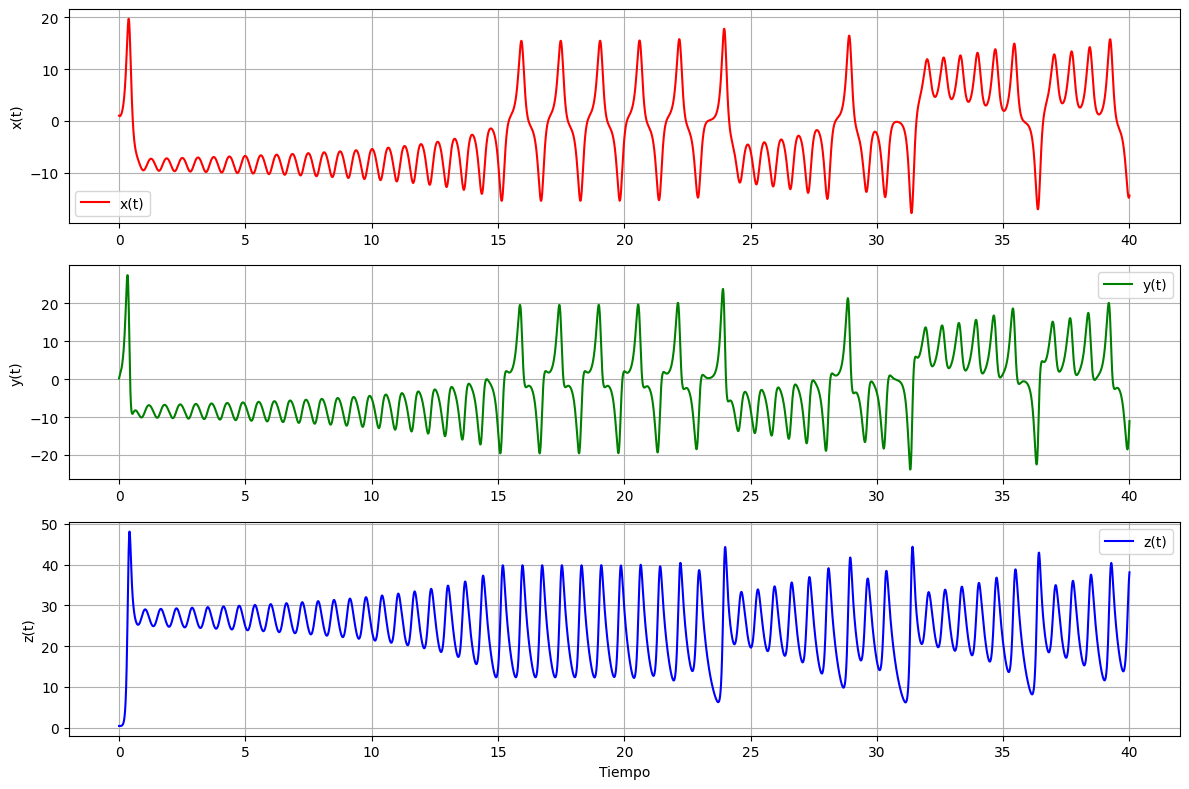

In [33]:
# Parámetros y condiciones del Caso 2
sigma = 10
rho = 28
beta = 8 / 3
x0 = 1.002025
y0 = 0.2
z0 = 0.4
t0 = 0
tf = 40
h = 0.01
n = int((tf - t0) / h)

# Ejecutar simulación
t, x, y, z = runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta)

# Gráficas x(t), y(t), z(t)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, color='red', label='x(t)')
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y, color='green', label='y(t)')
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, z, color='blue', label='z(t)')
plt.xlabel("Tiempo")
plt.ylabel("z(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 3.4.1. Análisis de las componentes $x(t)$, $y(t)$ y $z(t)$ Caso 2

Aunque los parámetros del sistema de Lorenz se mantuvieron idénticos a los del Caso 1, se modificaron ligeramente las condiciones iniciales: $x_0 = 1.002025$, $y_0 = 0.2$, $z_0 = 0.4$. Este pequeño cambio provoca una evolución completamente distinta de las funciones $x(t)$, $y(t)$ y $z(t)$, lo cual evidencia el carácter caótico del sistema.

#### 3.4.1.1. Análisis de $x(t)$

La función $x(t)$ muestra una oscilación inicial diferente respecto al Caso 1. Aunque su estructura general sigue siendo caótica y sin patrón periódico, se observan diferencias en la forma, frecuencia y ubicación de los picos. Esto refuerza el hecho de que el sistema es altamente sensible a variaciones pequeñas en los valores iniciales.

#### 3.4.1.2. Análisis de $y(t)$

La función $y(t)$ refleja un comportamiento muy similar al de $x(t)$, pero desplazado en magnitud y con mayor asimetría. Se observan períodos de oscilación amortiguada seguidos por picos más marcados, que indican transiciones rápidas entre regiones del espacio fase. 

#### 3.4.1.3. Análisis de $z(t)$

La variable $z(t)$ inicia con un crecimiento. A partir de ahí, entra en una zona de oscilaciones caóticas. La evolución de $z$ es más suave visualmente, pero también responde de forma drástica al pequeño cambio inicial, lo que demuestra que todo el sistema está afectado globalmente.


El análisis de las tres variables demuestra de forma contundente que el sistema de Lorenz **no es estable bajo cambios pequeños en condiciones iniciales**. Este es un claro ejemplo del principio de la **sensibilidad a condiciones iniciales** o "efecto mariposa", característico de los sistemas dinámicos caóticos.


### 3.4.2. Trayectoria tridimensional del atractor

Se muestra la trayectoria del sistema de Lorenz en el espacio $(x, y, z)$ para el Caso 2. A pesar de que los parámetros son los mismos que en el Caso 1, el cambio leve en las condiciones iniciales genera una trayectoria distinta, lo cual demuestra el carácter caótico del sistema.

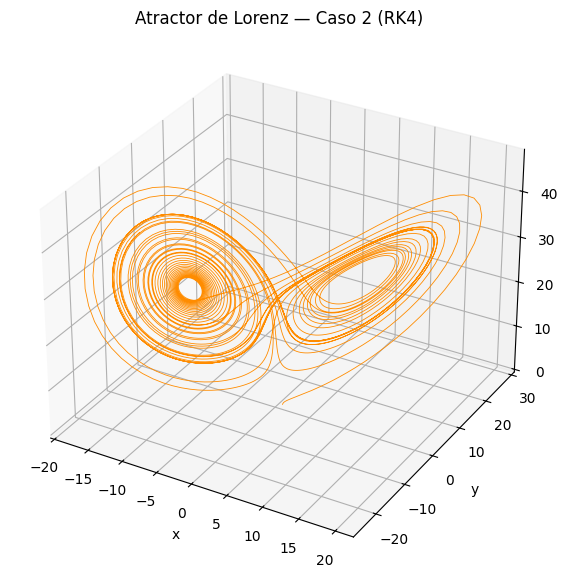

In [34]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='darkorange', lw=0.6)
ax.set_title("Atractor de Lorenz — Caso 2 (RK4)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


## 3.5. Simulación del Caso 3

En este tercer caso se cambian los parámetros del sistema de Lorenz, así como las condiciones iniciales. Esto permitirá observar cómo varía el comportamiento del sistema ante un cambio estructural y no solo de condiciones iniciales:

- $\sigma = 9$
- $\rho = 18$
- $\beta = \frac{10}{3}$
- Condiciones iniciales: $x_0 = 2$, $y_0 = 0.009$, $z_0 = 0.7$
- Intervalo de integración: $t \in [0, 40]$
- Paso de integración: $h = 0.01$


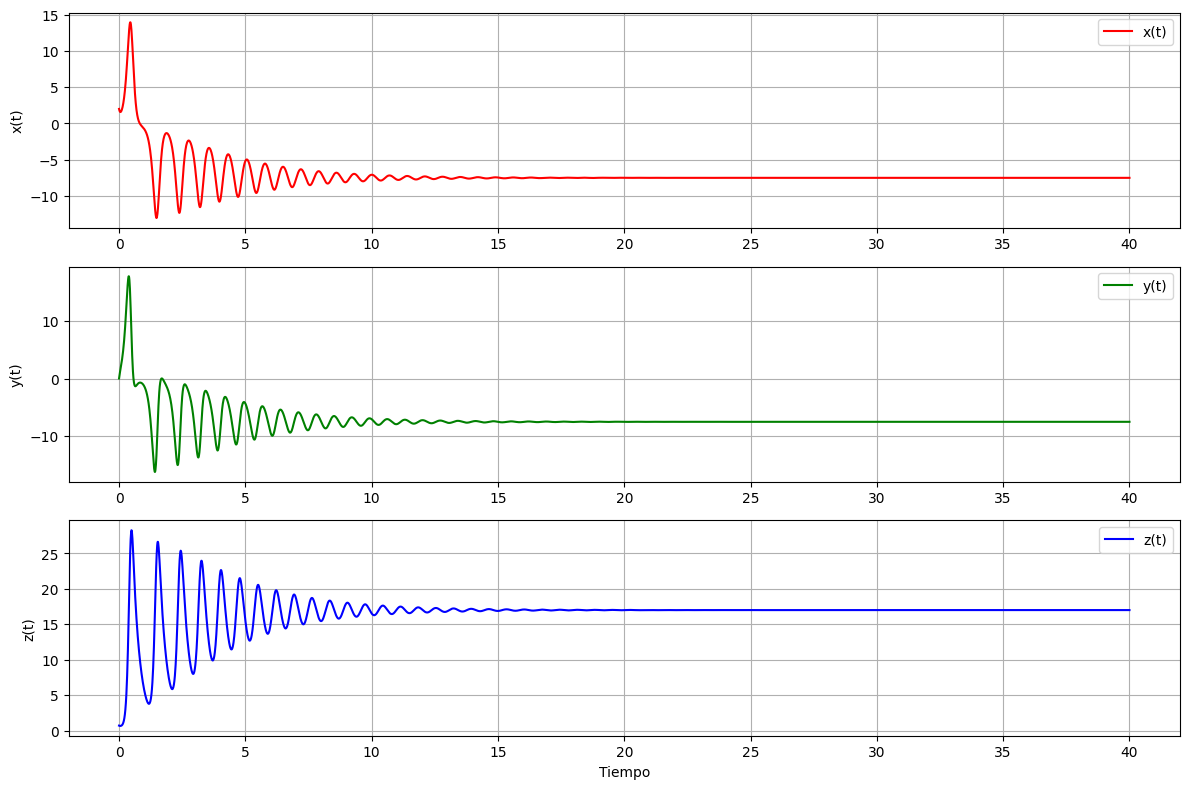

In [35]:
# Parámetros del Caso 3 
sigma = 9
rho = 18
beta = 10 / 3
x0 = 2
y0 = 0.009
z0 = 0.7
t0 = 0
tf = 40
h = 0.01
n = int((tf - t0) / h)

# Simulación con RK4
t, x, y, z = runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta)

# Gráficas x(t), y(t), z(t)
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, color='red', label='x(t)')
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y, color='green', label='y(t)')
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, z, color='blue', label='z(t)')
plt.xlabel("Tiempo")
plt.ylabel("z(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 3.5.1. Análisis de las componentes $x(t)$, $y(t)$ y $z(t)$  Caso 3

En este caso, al modificar los **parámetros estructurales** del sistema de Lorenz ($\sigma = 9$, $\rho = 18$, $\beta = \frac{10}{3}$), el comportamiento del sistema cambia notablemente en comparación con los casos anteriores. Se observan diferencias significativas en las trayectorias de $x(t)$, $y(t)$ y $z(t)$.

#### 3.5.1.1. Análisis de $x(t)$

La función $x(t)$ inicia con una oscilación pronunciada y luego entra en una serie de oscilaciones amortiguadas que tienden a estabilizarse rápidamente cerca de un valor constante negativo. Esto indica que el sistema está perdiendo energía y acercándose a un punto de equilibrio.

#### 3.5.1.2. Análisis de $y(t)$

La variable $y(t)$ sigue una dinámica muy similar a $x(t)$, aunque con un valor de estabilización diferente. Al igual que $x(t)$, sus oscilaciones se reducen rápidamente y desaparecen alrededor de $t \approx 20$, lo que sugiere que el sistema converge hacia un estado estable.

#### 3.5.1.3. Análisis de $z(t)$

A diferencia de $x(t)$ y $y(t)$, la función $z(t)$ muestra una convergencia hacia un valor positivo constante, luego de un conjunto de oscilaciones decrecientes. Esta estabilización en $z$ indica que el sistema ha dejado de presentar el comportamiento caótico de los casos anteriores.


Este caso muestra que al modificar adecuadamente los parámetros $\sigma$, $\rho$ y $\beta$, el sistema de Lorenz puede **perder su carácter caótico** y **tender a un punto de equilibrio estable**. A diferencia de los casos 1 y 2 donde el sistema nunca se estabiliza, en este caso el sistema converge hacia una solución estacionaria. Esta observación es fundamental para comprender cómo el **caos en Lorenz no depende solo de condiciones iniciales**, sino también de los **valores críticos de los parámetros del sistema**.


### 3.5.2. Trayectoria tridimensional del atractor

Con los nuevos parámetros y condiciones iniciales, se espera que el sistema presente un comportamiento diferente al observado en los casos anteriores. A continuación se muestra la trayectoria del sistema en el espacio $(x, y, z)$.

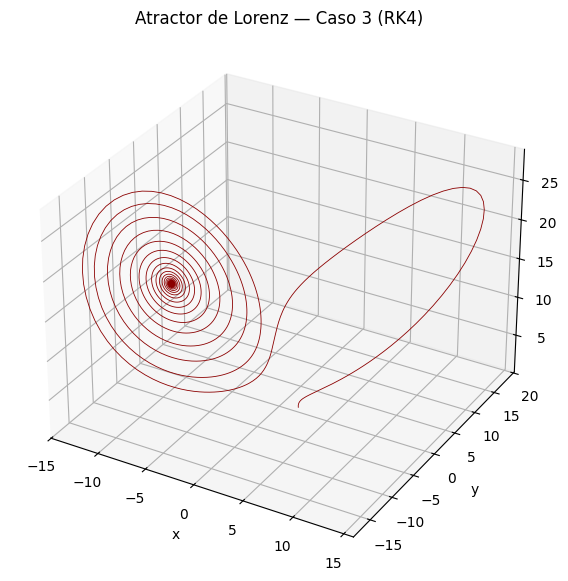

In [36]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='darkred', lw=0.6)
ax.set_title("Atractor de Lorenz — Caso 3 (RK4)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


# 4. Comparación de métodos: Euler vs Runge-Kutta de cuarto orden (RK4)

## 4.1. ¿Cuál método es más adecuado para simular el sistema de Lorenz?

El método de **Runge-Kutta de cuarto orden (RK4)** es claramente **más adecuado** para simular el sistema de Lorenz que el **método de Euler**, debido a su mayor precisión, estabilidad y comportamiento más realista frente a sistemas caóticos [6]. 


## 4.2. Comportamiento caótico típico

- **Método de Euler:** muestra trayectorias irregulares con **saltos bruscos** y **comportamientos poco naturales**. El atractor se ve distorsionado y no conserva su forma esperada.
- **RK4:** reproduce el comportamiento caótico del sistema Lorenz con **trayectorias suaves**, coherentes y bien definidas.

## 4.3. Sensibilidad a condiciones iniciales

- **Euler:** debido a su baja precisión, **el error crece rápidamente**, generando trayectorias que se desvían significativamente.
- **RK4:** mantiene la fidelidad del sistema incluso con **ligeras variaciones** en las condiciones iniciales, permitiendo observar con claridad la sensibilidad caótica del sistema.


## 4.4. Comparación

En cuanto a precisión, el método de Euler presenta un error local de orden \( O(h^2) \), lo que lo hace menos confiable para fenómenos caóticos. En contraste, RK4 tiene un error local de orden \( O(h^5) \), siendo mucho más preciso. En términos de estabilidad numérica, RK4 es considerablemente más estable que Euler, especialmente en simulaciones prolongadas. 

Además, el método de Euler es muy sensible a pequeñas perturbaciones en las condiciones iniciales, lo que hace que su comportamiento sea inconsistente. Por el contrario, RK4 es más robusto ante estas variaciones, preservando la estructura del atractor. También se observa que RK4 representa el atractor de Lorenz con mayor claridad y fidelidad geométrica, mientras que Euler tiende a distorsionar su forma. Aunque RK4 tiene un costo computacional moderadamente más alto, este es justificable considerando la mejora sustancial en los resultados.


## 4.5. Conclusión final

**El método de Runge-Kutta de cuarto orden es más adecuado para simular el sistema de Lorenz**, ya que ofrece una mejor aproximación a la dinámica del sistema, captura con mayor fidelidad su comportamiento caótico, y requiere un número razonable de pasos para obtener resultados precisos y estables.


# 5. Análisis del Sistema de Lorenz 

Este apartado es el análisis teórico del sistema de Lorenz. Se estudian sus puntos fijos, la divergencia del campo vectorial, la evolución del volumen en el espacio de fase, y se interpreta geométricamente el comportamiento del sistema desde un punto de vista dinámico.[7]


## 5.1. Puntos fijos

Los puntos fijos del sistema de Lorenz se obtienen resolviendo la siguiente condición:

$$
\dot{x} = \dot{y} = \dot{z} = 0 \Rightarrow
\begin{cases}
\sigma(y - x) = 0 \\
x(\rho - z) - y = 0 \\
xy - \beta z = 0
\end{cases}
$$

De donde se deduce que existen tres puntos fijos:

$$
\begin{aligned}
P_0 &= (0, 0, 0) \\
P_\pm &= \left( \pm \sqrt{\beta(\rho - 1)}, \pm \sqrt{\beta(\rho - 1)}, \rho - 1 \right)
\end{aligned}
$$



In [1]:

from math import sqrt

def puntos_fijos(rho, beta):
    x_eq = sqrt(beta * (rho - 1))
    return [
        (0.0, 0.0, 0.0),
        (x_eq, x_eq, rho - 1),
        (-x_eq, -x_eq, rho - 1)
    ]

rho, beta = 28, 8/3
p_fijos = puntos_fijos(rho, beta)
for i, p in enumerate(p_fijos):
    print(f"Punto fijo {i}: x = {p[0]:.4f}, y = {p[1]:.4f}, z = {p[2]:.4f}")


Punto fijo 0: x = 0.0000, y = 0.0000, z = 0.0000
Punto fijo 1: x = 8.4853, y = 8.4853, z = 27.0000
Punto fijo 2: x = -8.4853, y = -8.4853, z = 27.0000


### 5.1.1. ¿Cómo se comportan los puntos fijos?

Una vez obtenidos los puntos fijos del sistema de Lorenz:

- \( P_0 = (0, 0, 0) \)

- Los otros dos puntos fijos son:

$$
P_{\pm} = \left( \pm \sqrt{\beta(\rho - 1)},\ \pm \sqrt{\beta(\rho - 1)},\ \rho - 1 \right)
$$

Podemos analizarlos linealizando el sistema alrededor de cada punto (análisis de estabilidad con la matriz Jacobiana).


#### 5.1.1.1. Punto A: \( P_0 = (0, 0, 0) \)

La matriz Jacobiana del sistema evaluada en \( P_0 \) tiene autovalores reales con signo mixto para $$ \rho > 1.$$

Esto implica que el punto es **inestable tipo silla**.  
Las trayectorias divergen de este punto en al menos una dirección.



#### 5.1.1.2. Punto B: puntos $P_{\pm}$

Los dos puntos fijos simétricos están dados por:

$$
P_{\pm} = \left( \pm \sqrt{\beta(\rho - 1)},\ \pm \sqrt{\beta(\rho - 1)},\ \rho - 1 \right)
$$

- Para $ \rho > \rho_c \approx 24.74 $, estos puntos se vuelven **inestables**, y el sistema comienza a exhibir **dinámica caótica**.[9]

- Para $ \rho < \rho_c $, este punto puede actuar como **atractor local**, pero no global.


#### 5.1.1.3. Punto C: $ P_- = \left( -\sqrt{\beta(\rho - 1)},\ -\sqrt{\beta(\rho - 1)},\ \rho - 1 \right) $

Este punto es simétrico a \( P_+ \), con el mismo comportamiento dinámico:

- Es **inestable** cuando $ \rho > \rho_c $.
- Puede ser **atractor local** cuando $ \rho < \rho_c $.


### 5.1.2. Resumen
Los tres puntos fijos juegan un rol central en la dinámica del sistema de Lorenz. A medida que el parámetro $ \rho $ cruza ciertos umbrales, el sistema pasa de estabilidad a caos. Estos puntos marcan transiciones clave y ayudan a entender cómo surgen estructuras atractoras en el espacio de fase.


## 5.2. Divergencia del campo vectorial


El campo vectorial del sistema de Lorenz es:

$$
\vec{F}(x, y, z) =
\begin{pmatrix}
\sigma (y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
$$

La divergencia se calcula como:

$$
\nabla \cdot \vec{F} =
\frac{\partial F_x}{\partial x} +
\frac{\partial F_y}{\partial y} +
\frac{\partial F_z}{\partial z}
= -\sigma - 1 - \beta
$$
[10]


In [2]:

def divergencia_lorenz(sigma, beta):
    return -sigma - 1 - beta

sigma = 10
div = divergencia_lorenz(sigma, beta)
print(f"Divergencia del campo vectorial: {div:.4f}")


Divergencia del campo vectorial: -13.6667


### 5.2.1. Interpretación geométrica

Dado que la divergencia es negativa constante, el sistema de Lorenz es un **sistema disipativo**. Esto significa que las trayectorias en el espacio de fase tienden a comprimirse en un volumen cada vez menor con el tiempo.

La contracción del volumen en el espacio tridimensional se relaciona con la aparición de un atractor extraño: un conjunto hacia el cual convergen las trayectorias del sistema a pesar de la sensibilidad a condiciones iniciales.

Este comportamiento es característico de los **sistemas dinámicos caóticos**.[10]


## 5.3. Integral de flujo en el espacio de fase

El espacio de fase del sistema de Lorenz está definido por las variables \( (x, y, z) \), y puede analizarse en términos de un volumen dinámico \( V(t) \) limitado por una superficie \( S(t) \). La tasa de cambio del volumen está dada por la **integral de flujo** sobre dicha superficie:

$$
\frac{dV(t)}{dt} = \iint_{S(t)} \vec{F} \cdot d\vec{S}
$$

donde $  \vec{F} $  es el campo vectorial del sistema de Lorenz, y $  d\vec{S}  $ es el vector normal a la superficie \( S(t) \).

Aplicando el **teorema de la divergencia (Gauss)**, la integral de flujo se puede reescribir como una integral sobre el volumen:

$$
\frac{dV(t)}{dt} = \iiint_{V(t)} \nabla \cdot \vec{F} \, dV
$$

Dado que en el sistema de Lorenz la divergencia es constante y negativa:

$$
\nabla \cdot \vec{F} = -(\sigma + 1 + \beta)
$$

se puede extraer de la integral:

$$
\frac{dV(t)}{dt} = -(\sigma + 1 + \beta) \cdot V(t)
$$

Esto lleva directamente a una **ecuación diferencial ordinaria** para el volumen.


## 5.4. Resolución de la ecuación diferencial para \( V(t) \) y análisis

La ecuación diferencial obtenida en el paso anterior es de la forma:

$$
\frac{dV(t)}{dt} = -\lambda \cdot V(t), \quad \text{donde } \lambda = \sigma + 1 + \beta
$$

Se trata de una EDO de primer orden con solución:

$$
V(t) = V_0 \cdot e^{-\lambda t}
$$

### 5.4.1. ¿Cómo cambia el volumen con respecto al tiempo?

La solución muestra que el volumen del espacio de fase **disminuye exponencialmente** con el tiempo. Esto implica que, aunque las trayectorias del sistema divergen unas de otras debido a la sensibilidad a condiciones iniciales, **todas permanecen confinadas dentro de una región que colapsa hacia un atractor**.

Este comportamiento se traduce en una evolución no conservativa: el sistema **pierde volumen en el espacio de fase**, lo que confirma que es **disipativo**. Las soluciones no llenan todo el espacio tridimensional, sino que se agrupan en una subestructura de menor dimensión (el atractor de Lorenz), donde se concentra la dinámica del sistema a largo plazo.[8]


### 5.4.2. Evolución del volumen \(V(t)\) en el espacio de fase

La ecuación que rige la evolución del volumen de una región del espacio de fase es:

$$
\frac{dV(t)}{dt} = \nabla \cdot \vec{F} \cdot V(t) \Rightarrow V(t) = V_0 \cdot e^{-(\sigma + 1 + \beta)t}
$$

Esto implica que el volumen decrece **exponencialmente** en el tiempo, lo que confirma que el sistema converge hacia una estructura atractora de menor dimensión.


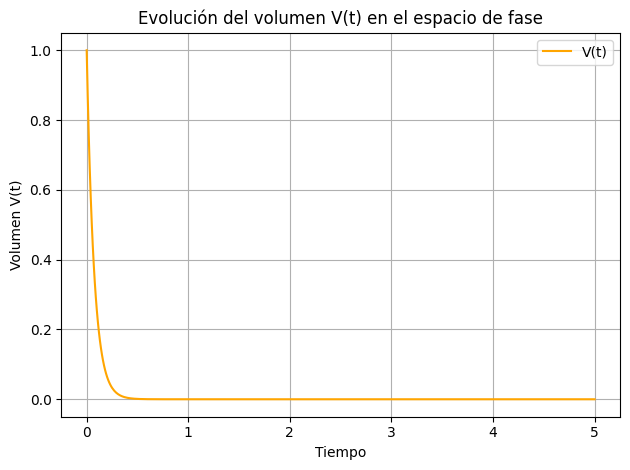

In [3]:

import numpy as np
import matplotlib.pyplot as plt

def volumen_vs_t(t, V0, sigma, beta):
    lam = sigma + 1 + beta
    return V0 * np.exp(-lam * t)

V0 = 1
t = np.linspace(0, 5, 500)
V = volumen_vs_t(t, V0, sigma, beta)

plt.plot(t, V, label='V(t)', color='orange')
plt.title("Evolución del volumen V(t) en el espacio de fase")
plt.xlabel("Tiempo")
plt.ylabel("Volumen V(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 5.4.3. Justifique y analice ¿cómo cambia el volumen?

El volumen \( V(t) \) en el espacio de fase disminuye según la ecuación:

$$
V(t) = V_0 \cdot e^{-(\sigma + 1 + \beta)t}
$$

Esto significa que el sistema **pierde volumen en el espacio de fase**, lo cual indica que **no es conservativo**. Esta propiedad se asocia con sistemas **disipativos**, en los que la energía o volumen se disipa con el tiempo.

Aunque las trayectorias divergen debido a la sensibilidad a las condiciones iniciales, **todas se colapsan hacia una región finita del espacio**: el **atractor de Lorenz**. Esta estructura es de dimensión fraccionaria y representa un **estado caótico pero acotado**.


## 5.5. ¿Es el sistema conservativo? 

Para determinar si el sistema de Lorenz es conservativo, debemos analizar la **divergencia del campo vectorial** asociado. Un sistema dinámico es **conservativo** si su divergencia es igual a cero, es decir:


$$
\nabla \cdot \vec{F} = 0
$$


Recordemos que el sistema de Lorenz está definido por:


$$
\vec{F}(x, y, z) =
\begin{pmatrix}
\sigma(y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
$$


La divergencia de este campo se calcula como:


$$
\nabla \cdot \vec{F} = \frac{\partial F_1}{\partial x} + \frac{\partial F_2}{\partial y} + \frac{\partial F_3}{\partial z}
= -\sigma - 1 - \beta
$$


Ya que los parámetros del sistema son positivos $( \sigma = 10 ), ( \beta = 8/3 ), ( \rho = 28 )$, el resultado de la divergencia es:


$$
\nabla \cdot \vec{F} = -\left(10 + 1 + \frac{8}{3}\right) = -\frac{41}{3} \approx -13.6667
$$


Este valor es **constante y negativo**, por lo tanto:

- El sistema **no es conservativo**.
- Es un sistema **disipativo**, lo que significa que las trayectorias tienden a comprimir el volumen del espacio de fase a medida que evoluciona el tiempo.
- Esta propiedad fue confirmada anteriormente mediante la ecuación:

$$
\frac{dV(t)}{dt} = -(\sigma + 1 + \beta) \cdot V(t) \Rightarrow V(t) = V_0 e^{-(\sigma + 1 + \beta)t}
$$


La solución muestra una **disminución exponencial** del volumen \( V(t) \), lo cual implica disipación de energía o volumen en el sistema.


## 5.6. Análisis de fase para el sistema

Un **análisis de fase** consiste en estudiar el comportamiento cualitativo de las trayectorias del sistema en el espacio tridimensional $(x, y, z)$, sin necesidad de resolver las ecuaciones explícitamente.

En el caso del sistema de Lorenz, los **puntos fijos** encontrados previamente son:


$$
P_0 = (0, 0, 0), \quad
P_\pm = \left( \pm \sqrt{\beta(\rho - 1)}, \pm \sqrt{\beta(\rho - 1)}, \rho - 1 \right)
$$


Dependiendo del valor del parámetro \( \rho \), se observan diferentes comportamientos dinámicos:

- Cuando $ \rho < 1 $: el único punto fijo real es el origen, y es **estable**.
- Cuando $ 1 < \rho < \rho_c \approx 24.74 $: aparecen los puntos $ P_\pm $, que pueden actuar como **atractores locales**.
- Cuando $ \rho > \rho_c $: el sistema exhibe **dinámica caótica**; los puntos fijos se vuelven **inestables** y las trayectorias oscilan de manera no periódica en torno a un atractor extraño.

Este comportamiento se evidencia gráficamente en las simulaciones realizadas con diferentes condiciones iniciales, donde las trayectorias no tienden hacia un punto o ciclo límite, sino que evolucionan dentro de una región definida del espacio de fase, generando un patrón tipo mariposa conocido como el **atractor de Lorenz**.

Además, la existencia de una **divergencia negativa constante** implica que el volumen ocupado por las soluciones en el espacio de fase disminuye con el tiempo, reforzando la idea de que el sistema converge hacia una región atractora de menor dimensión.


## 5.7. Estabilidad local cerca del origen

Para estudiar la estabilidad del sistema cerca del origen $ P_0 = (0, 0, 0) $, se linealiza el sistema mediante la **matriz Jacobiana** evaluada en ese punto. Ya fue calculada anteriormente, y está dada por:


$$
J(P_0) =
\begin{pmatrix}
-\sigma & \sigma & 0 \\
\rho & -1 & 0 \\
0 & 0 & -\beta
\end{pmatrix}
$$


Los **autovalores** de esta matriz determinan la estabilidad local. Para los parámetros clásicos $( \sigma = 10, \rho = 28, \beta = 8/3 )$, se tiene que:

- Uno de los autovalores es positivo.
- Otro es negativo.
- El tercero también es negativo.

Esto significa que el punto fijo en el origen es un **punto silla**: presenta direcciones de atracción y repulsión simultáneamente. Por lo tanto, el origen es **inestable**, ya que las trayectorias cercanas divergen de él con el tiempo, al menos en una dirección del espacio.

Este resultado es consistente con el comportamiento caótico del sistema para $ \rho > \rho_c $, ya que no existe una atracción estable hacia el origen, sino una evolución compleja hacia una región atractora.


## 5.8. Conclusión del Análisis del Sistema de Lorenz

En este estudio, se identificaron los **puntos fijos** del sistema de Lorenz y se analizó su estabilidad. Se encontró que para ciertos valores de $ \rho $, el sistema presenta **inestabilidad** y tiende a un comportamiento **caótico**.

A través del cálculo de la **divergencia del campo vectorial**, se verificó que el sistema es **disipativo**, y esta propiedad se reflejó en la evolución **exponencialmente decreciente del volumen \( V(t) \)** en el espacio de fase.

Este colapso del volumen muestra que, aunque las trayectorias se separan por pequeñas diferencias en las condiciones iniciales, **todas terminan confinadas en una región** del espacio: el **atractor extraño de Lorenz**.

Este sistema ejemplifica de forma clara los principios del **caos determinista**, siendo impredecible a largo plazo, pero con una estructura interna definida.

En este análisis, descubrimos que el sistema de Lorenz **no es conservativo**. Esto significa que no mantiene su volumen a lo largo del tiempo. A medida que el sistema evoluciona, el volumen del espacio en el que se mueven las trayectorias tiende a reducirse. En lugar de conservarse, se **disipa**. Esto es un comportamiento típico de sistemas donde la energía o el volumen se pierden, lo que lo convierte en un sistema **caótico** que no sigue las reglas de conservación.

El análisis de fase nos ayuda a entender cómo se comportan las trayectorias del sistema de Lorenz. Cuando el parámetro $ \rho $ es menor que un valor crítico, el sistema se comporta de manera más predecible, pero cuando $ \rho $ supera ese valor, el sistema se vuelve **caótico**. Esto significa que pequeñas diferencias en las condiciones iniciales pueden llevar a comportamientos completamente distintos. Las trayectorias ya no siguen un patrón predecible y se alejan de cualquier ciclo fijo, lo que genera lo que conocemos como un **atractor extraño**. Es como si el sistema tuviera un comportamiento impredecible pero estructurado, siempre dentro de un espacio limitado.


Cuando analizamos el origen del sistema, encontramos que **no es un punto estable**. Es un **punto silla**, lo que significa que en algunas direcciones las trayectorias se acercan al origen, pero en otras se alejan de él. Esto muestra que el sistema es **inestable** cerca del origen. Este comportamiento es un indicio claro de que el sistema de Lorenz se comporta de manera impredecible, ya que no hay un punto fijo donde las trayectorias se estabilicen. Esto es típico de los sistemas caóticos, donde incluso pequeñas variaciones en las condiciones iniciales pueden llevar a resultados muy diferentes.

# 6. Animaciones del sistema de Lorenz

En este apartado se presentan los códigos correspondientes a las animaciones generadas para los modelos de Euler, Runge-Kutta 4 y una comparación entre ambos.

## 6.1. Animación con el método de Euler y Runge-Kutta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#configurar ffmpeg para video
plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg'  

#METODO EULER
def lorenz_euler(x0, y0, z0, sigma, rho, beta, h, t_max):
    n = int(t_max / h)
    ts = np.linspace(0, t_max, n+1)
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0

    for _ in range(n):
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z

        x += h * dx
        y += h * dy
        z += h * dz

        xs.append(x)
        ys.append(y)
        zs.append(z)

    return ts, np.array(xs), np.array(ys), np.array(zs)

#METODO DE KUTTA 4
def lorenz_system(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

def runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n+1)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    x[0], y[0], z[0] = x0, y0, z0

    for i in range(n):
        dx1, dy1, dz1 = lorenz_system(x[i], y[i], z[i], sigma, rho, beta)
        dx2, dy2, dz2 = lorenz_system(x[i] + h*dx1/2, y[i] + h*dy1/2, z[i] + h*dz1/2, sigma, rho, beta)
        dx3, dy3, dz3 = lorenz_system(x[i] + h*dx2/2, y[i] + h*dy2/2, z[i] + h*dz2/2, sigma, rho, beta)
        dx4, dy4, dz4 = lorenz_system(x[i] + h*dx3, y[i] + h*dy3, z[i] + h*dz3, sigma, rho, beta)

        x[i+1] = x[i] + (h/6)*(dx1 + 2*dx2 + 2*dx3 + dx4)
        y[i+1] = y[i] + (h/6)*(dy1 + 2*dy2 + 2*dy3 + dy4)
        z[i+1] = z[i] + (h/6)*(dz1 + 2*dz2 + 2*dz3 + dz4)

    return t, x, y, z

#ANIMACION
def crear_animacion(ts, xs, ys, zs, filename, x0, y0, z0, sigma, rho, beta, h):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim((min(xs), max(xs)))
    ax.set_ylim((min(ys), max(ys)))
    ax.set_zlim((min(zs), max(zs)))
    ax.set_title("Sistema de Lorenz", fontsize=14)

    # texto parámetros
    param_text = (
        f"Condiciones iniciales:\n"
        f"x₀ = {x0}, y₀ = {y0}, z₀ = {z0}\n"
        f"σ = {sigma}, ρ = {rho}, β = {beta:.3f}\n"
        f"h = {h}"
    )
    text_box = ax.text2D(0.05, 0.95, param_text, transform=ax.transAxes,
                         fontsize=10, verticalalignment='top',
                         bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.7))

    line, = ax.plot([], [], [], lw=1.5, color='darkviolet')
    point, = ax.plot([], [], [], 'ro')

    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        point.set_data([], [])
        point.set_3d_properties([])
        return line, point, text_box

    def update(num):
        line.set_data(xs[:num], ys[:num])
        line.set_3d_properties(zs[:num])
        point.set_data(xs[num-1:num], ys[num-1:num])
        point.set_3d_properties(zs[num-1:num])
        return line, point, text_box

    ani = animation.FuncAnimation(fig, update, frames=len(ts), init_func=init, interval=20, blit=True)
    writer = animation.FFMpegWriter(fps=30)
    ani.save(filename, writer=writer)
    plt.close()

#FUNCIONES
def generar_animacion_euler():
    x0, y0, z0 = 1, 1, 1
    sigma, rho, beta = 10, 28, 8/3
    h = 0.01
    t_max = 30
    ts, xs, ys, zs = lorenz_euler(x0, y0, z0, sigma, rho, beta, h, t_max)
    crear_animacion(ts, xs, ys, zs, "lorenzz_euler.mp4", x0, y0, z0, sigma, rho, beta, h)
    print("Animación método de Euler guardada como lorenzz_euler.mp4")

def generar_animacion_rk4():
    x0, y0, z0 = 1, 1, 1
    sigma, rho, beta = 10, 28, 8/3
    h = 0.01
    t0, tf = 0, 30
    ts, xs, ys, zs = runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta)
    crear_animacion(ts, xs, ys, zs, "lorenzz_rk4.mp4", x0, y0, z0, sigma, rho, beta, h)
    print("Animación método de Runge-Kutta guardada como lorenzz_rk4.mp4")

#EJECUCION
#generar_animacion_euler()
#generar_animacion_rk4()


## 6.2. Animación comparativa de ambos métodos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg' 

#EULER
def lorenz_euler(x0, y0, z0, sigma, rho, beta, h, t_max):
    n = int(t_max / h)
    ts = np.linspace(0, t_max, n+1)
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n):
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        x += h * dx
        y += h * dy
        z += h * dz
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, np.array(xs), np.array(ys), np.array(zs)

#KUTTA
def lorenz_system(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

def runge_kutta_4(x0, y0, z0, t0, tf, h, sigma, rho, beta):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n+1)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    x[0], y[0], z[0] = x0, y0, z0
    for i in range(n):
        dx1, dy1, dz1 = lorenz_system(x[i], y[i], z[i], sigma, rho, beta)
        dx2, dy2, dz2 = lorenz_system(x[i] + h*dx1/2, y[i] + h*dy1/2, z[i] + h*dz1/2, sigma, rho, beta)
        dx3, dy3, dz3 = lorenz_system(x[i] + h*dx2/2, y[i] + h*dy2/2, z[i] + h*dz2/2, sigma, rho, beta)
        dx4, dy4, dz4 = lorenz_system(x[i] + h*dx3, y[i] + h*dy3, z[i] + h*dz3, sigma, rho, beta)
        x[i+1] = x[i] + (h/6)*(dx1 + 2*dx2 + 2*dx3 + dx4)
        y[i+1] = y[i] + (h/6)*(dy1 + 2*dy2 + 2*dy3 + dy4)
        z[i+1] = z[i] + (h/6)*(dz1 + 2*dz2 + 2*dz3 + dz4)
    return t, x, y, z

#ANIMACION DE COMPARACION
def crear_animacion_comparativa(ts, datos_euler, datos_rk4, filename, duration_sec=720, fps=10):
    frames_total = duration_sec * fps
    xs1, ys1, zs1 = datos_euler
    xs2, ys2, zs2 = datos_rk4

    indices = np.linspace(0, len(ts)-1, frames_total, dtype=int)
    xs1, ys1, zs1 = xs1[indices], ys1[indices], zs1[indices]
    xs2, ys2, zs2 = xs2[indices], ys2[indices], zs2[indices]

    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    ax1.set_title("Método de Euler")
    ax2.set_title("Método de Runge-Kutta 4")

    for ax, xs, ys, zs in zip((ax1, ax2), (xs1, xs2), (ys1, ys2), (zs1, zs2)):
        ax.set_xlim((min(xs), max(xs)))
        ax.set_ylim((min(ys), max(ys)))
        ax.set_zlim((min(zs), max(zs)))
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

    line1, = ax1.plot([], [], [], lw=1.2, color='tab:blue')
    point1, = ax1.plot([], [], [], 'ro')
    line2, = ax2.plot([], [], [], lw=1.2, color='tab:green')
    point2, = ax2.plot([], [], [], 'ro')

    def init():
        for line, point in [(line1, point1), (line2, point2)]:
            line.set_data([], [])
            line.set_3d_properties([])
            point.set_data([], [])
            point.set_3d_properties([])
        return line1, point1, line2, point2

    def update(num):
        line1.set_data(xs1[:num], ys1[:num])
        line1.set_3d_properties(zs1[:num])
        point1.set_data(xs1[num-1:num], ys1[num-1:num])
        point1.set_3d_properties(zs1[num-1:num])

        line2.set_data(xs2[:num], ys2[:num])
        line2.set_3d_properties(zs2[:num])
        point2.set_data(xs2[num-1:num], ys2[num-1:num])
        point2.set_3d_properties(zs2[num-1:num])
        return line1, point1, line2, point2

    ani = animation.FuncAnimation(fig, update, frames=frames_total, init_func=init, interval=1000/fps, blit=True)
    writer = animation.FFMpegWriter(fps=fps)
    ani.save(filename, writer=writer)
    plt.close()

#EJECUTA
def generar_animacion_comparativa():
    x0, y0, z0 = 2.0, 0.009, 0.7
    sigma = 9
    rho = 18
    beta = 10 / 3
    h = 0.01
    T = 60  # sistema simulado por 60 s

    ts1, xs1, ys1, zs1 = lorenz_euler(x0, y0, z0, sigma, rho, beta, h, T)
    ts2, xs2, ys2, zs2 = runge_kutta_4(x0, y0, z0, 0, T, h, sigma, rho, beta)

    crear_animacion_comparativa(ts1, (xs1, ys1, zs1), (xs2, ys2, zs2), "lorenzVS.mp4", duration_sec=60, fps=30)
    print("Animación comparativa guardada como 'lorenzVS.mp4'")

#Ejecuta
if __name__ == "__main__":
    generar_animacion_comparativa()


# 7. Conclusiones

- A lo largo del proyecto, se puedo confirmar que el sistema de Lorenz presenta una sensibilidad extrema a los cambios en las condiciones iniciales, incluso pequeñas modificaciones en los valores de partida provocaban trayectorias completamente distintas en poco tiempo. Esta propiedad, es típica de los sistemas caóticos, ya que hace que aunque las ecuaciones sean deterministas, el comportamiento a largo plazo siga siendo difícil de anticipar.

- Un aspecto que resultó especialmente valioso fue la visualización del sistema a través de simulaciones gráficas, debido a que poder observar la evolución del atractor de Lorenz en tiempo real permitió identificar patrones, contrastar métodos y comprender de manera más intuitiva conceptos como la divergencia de trayectorias y la naturaleza caótica del sistema.

- En cuanto al parámetro ℎ quedó claro que su elección tiene un impacto directo sobre la estabilidad y precisión de los resultados, por la razón que usar un valor demasiado grande distorsiona el comportamiento del sistema, mientras que valores muy pequeños, aunque un poco más precisos, aumentan significativamente la carga computacional. De manera que, tuvo que ser necesario ajustar este parámetro cuidadosamente para lograr un buen equilibrio entre eficiencia y fidelidad para la simulación de los modelos.

# 8. Bibliografía

[1] J. Aleixandre, “¿Qué es el efecto mariposa?”, *National Geographic España*, Mar. 22, 2022. [En línea]. Disponible en: https://www.nationalgeographic.es/ciencia/el-efecto-mariposa

[2] “Lyapunov Exponent,” *ScienceDirect Topics*, Elsevier. [En línea]. Disponible en: https://www.sciencedirect.com/topics/engineering/lyapunov-exponent

[3] H. D. I. Abarbanel, R. Brown, and M. B. Kennel, “Bifurcation schemes and Lyapunov characteristic exponents for the Lorenz model,” *Physica D: Nonlinear Phenomena*, vol. 5, no. 3, pp. 343–362, 1984. [En línea]. Disponible en: https://www.sciencedirect.com/science/article/abs/pii/016727898490441X

[4]: Hirsch, M.W. et al. (2004). *Differential Equations, Dynamical Systems, and an Introduction to Chaos*

[5] E. Butcher, *Numerical Methods for Ordinary Differential Equations*, 2nd ed. Wiley, 2008.  

[6] S. D. Conte and C. de Boor, *Elementary Numerical Analysis: An Algorithmic Approach*, 3rd ed. McGraw-Hill, 1980.

[7] E. N. Lorenz, "Deterministic Nonperiodic Flow," *Journal of the Atmospheric Sciences*, vol. 20, no. 2, pp. 130–141, 1963. [En línea]. Disponible en: https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml

[8] Massachusetts Institute of Technology, “Lecture 6–7: The Lorenz System,” course notes for *12.006J/18.353J Nonlinear Dynamics & Chaos*, MIT OpenCourseWare, Cambridge, MA, USA, Fall 2022. [En línea]. Disponible en: https://ocw.mit.edu/courses/12-006j-nonlinear-dynamics-chaos-fall-2022/mit12_006jf22_lec6-7.pdf.

[9] R. C. Hilborn, *Chaos and Nonlinear Dynamics: An Introduction for Scientists and Engineers*. Oxford University Press, 2000. [En línea]. Disponible en: https://global.oup.com/academic/product/chaos-and-nonlinear-dynamics-9780198507239

[10] Math Insight, “Divergence and flow of vector fields.” [En línea]. Disponible en: https://mathinsight.org/divergence_idea